In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Base directory where datasets are stored
base_dir = '../checkpoints/result/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']

In [28]:
def parse_train_txt(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1])
        }
    return result

In [29]:

# List to store results
results = []

# Loop through datasets and collect data from train.txt files
for dataset in datasets:
    dataset_path = os.path.join(base_dir, dataset)
    for dir_name in os.listdir(dataset_path):
        if dir_name.startswith('GaussianImage_Cholesky'):
            gaussian_count = int(dir_name.split('_')[-1])
            train_txt_path = os.path.join(dataset_path, dir_name, 'train.txt')
            if os.path.exists(train_txt_path):
                result = parse_train_txt(train_txt_path)
                result['GaussianCount'] = gaussian_count
                result['Dataset'] = dataset
                results.append(result)
# Sort the results by GaussianCount before converting to DataFrame
results_sorted = sorted(results, key=lambda x: x['GaussianCount'])
# Convert results to a DataFrame
df = pd.DataFrame(results_sorted)

In [30]:
def plot_gaussian_vs_metrics(df):
    for dataset in datasets:
        subset_df = df[df['Dataset'] == dataset].sort_values(by='GaussianCount')

        # 设置图像大小
        plt.figure(figsize=(10, 5))

        # 第一个子图：Gaussian count vs PSNR
        plt.subplot(2, 1, 1)

        # 设置圈的大小
        sizes = subset_df['Size'] * 2  # Scale the circle sizes

        # 散点图和连线
        plt.scatter(subset_df['GaussianCount'], subset_df['PSNR'], s=sizes, alpha=0.7, label='PSNR', c='blue', edgecolor='black')
        plt.plot(subset_df['GaussianCount'], subset_df['PSNR'], 'b-', alpha=0.7)

        # 添加注释（每个点的Size）
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["Size"].iloc[i]:.2f} MB',
                         (subset_df['GaussianCount'].iloc[i], subset_df['PSNR'].iloc[i]),
                         textcoords="offset points", xytext=(0, -10), ha='center', va='center')

        # 添加标题和标签
        plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
        plt.ylabel('PSNR (dB)', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Gaussian Number vs PSNR', fontsize=16, fontweight='bold')

        # 添加图例
        #plt.legend(loc='upper left')

        # X轴刻度设置和网格
        plt.xticks(range(5000, 55000, 5000))
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # 第二个子图：Gaussian count vs MS-SSIM
        plt.subplot(2, 1, 2)

        # 散点图和连线
        plt.scatter(subset_df['GaussianCount'], subset_df['MS-SSIM'], s=sizes, alpha=0.7, label='MS-SSIM', c='orange', edgecolor='black')
        plt.plot(subset_df['GaussianCount'], subset_df['MS-SSIM'], 'r-', alpha=0.7)

        # 添加注释（每个点的Size）
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["Size"].iloc[i]:.2f} MB',
                         (subset_df['GaussianCount'].iloc[i], subset_df['MS-SSIM'].iloc[i]),
                         textcoords="offset points", xytext=(0, -10), ha='center', va='center')

        # 添加标题和标签
        plt.xlabel('Gaussian Number', fontsize=14, fontweight='bold')
        plt.ylabel('MS-SSIM', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Gaussian Number vs MS-SSIM', fontsize=16, fontweight='bold')

        # 添加图例
        #plt.legend(loc='upper left')

        # X轴刻度设置和网格
        plt.xticks(range(5000, 55000, 5000))
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # 布局调整
        plt.tight_layout()

        # 保存图像
        plt.savefig(f'./img/{dataset}_gaussian_vs_metrics.png')

        # 显示图像
        plt.show()


In [31]:
# Function to plot Size vs PSNR, MS-SSIM, and Gaussian Count for each dataset separately
def plot_size_vs_metrics(df):
    for dataset in datasets:
        subset_df = df[df['Dataset'] == dataset].sort_values(by='Size')

        plt.figure(figsize=(10, 7.5))

        # 第一个子图：Size vs PSNR
        plt.subplot(3, 1, 1)
        sizes = subset_df['GaussianCount'] * 0.05  # 调整 Gaussian Count 的比例

        # 散点图和连线
        plt.scatter(subset_df['Size'], subset_df['PSNR'], s=sizes, alpha=0.7, label='PSNR', c='blue', edgecolor='black')
        plt.plot(subset_df['Size'], subset_df['PSNR'], 'b-', alpha=0.7)

        # 添加标注 (Gaussian Count)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  
                         (subset_df['Size'].iloc[i], subset_df['PSNR'].iloc[i]),
                         textcoords="offset points", xytext=(0, 5), ha='center')

        # 设置标题、标签和网格
        plt.xlabel('Model Size (MB)', fontsize=14, fontweight='bold')
        plt.ylabel('PSNR (dB)', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Model Size vs PSNR', fontsize=16, fontweight='bold')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # 第二个子图：Size vs MS-SSIM
        plt.subplot(3, 1, 2)

        # 散点图和连线
        plt.scatter(subset_df['Size'], subset_df['MS-SSIM'], s=sizes, alpha=0.7, label='MS-SSIM', c='orange', edgecolor='black')
        plt.plot(subset_df['Size'], subset_df['MS-SSIM'], 'r-', alpha=0.7)

        # 添加标注 (Gaussian Count)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  
                         (subset_df['Size'].iloc[i], subset_df['MS-SSIM'].iloc[i]),
                         textcoords="offset points", xytext=(0, 5), ha='center')

        # 设置标题、标签和网格
        plt.xlabel('Model Size (MB)', fontsize=14, fontweight='bold')
        plt.ylabel('MS-SSIM', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Model Size vs MS-SSIM', fontsize=16, fontweight='bold')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # 第三个子图：Size vs Gaussian Count
        plt.subplot(3, 1, 3)

        # 散点图和连线
        plt.scatter(subset_df['Size'], subset_df['GaussianCount'], s=sizes, alpha=0.7, label='Gaussian Count', c='green', edgecolor='black')
        plt.plot(subset_df['Size'], subset_df['GaussianCount'], 'g-', alpha=0.7)

        # 添加标注 (Gaussian Count)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  
                         (subset_df['Size'].iloc[i], subset_df['GaussianCount'].iloc[i]),
                         textcoords="offset points", xytext=(0, 5), ha='center')

        # 设置标题、标签和网格
        plt.xlabel('Model Size (MB)', fontsize=14, fontweight='bold')
        plt.ylabel('Gaussian Count', fontsize=14, fontweight='bold')
        plt.title(f'{dataset} - Model Size vs Gaussian Count', fontsize=16, fontweight='bold')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()

        # 布局调整
        plt.tight_layout()

        # 保存图像
        plt.savefig(f'./img/{dataset}_size_vs_metrics.png')

        # 显示图像
        plt.show()


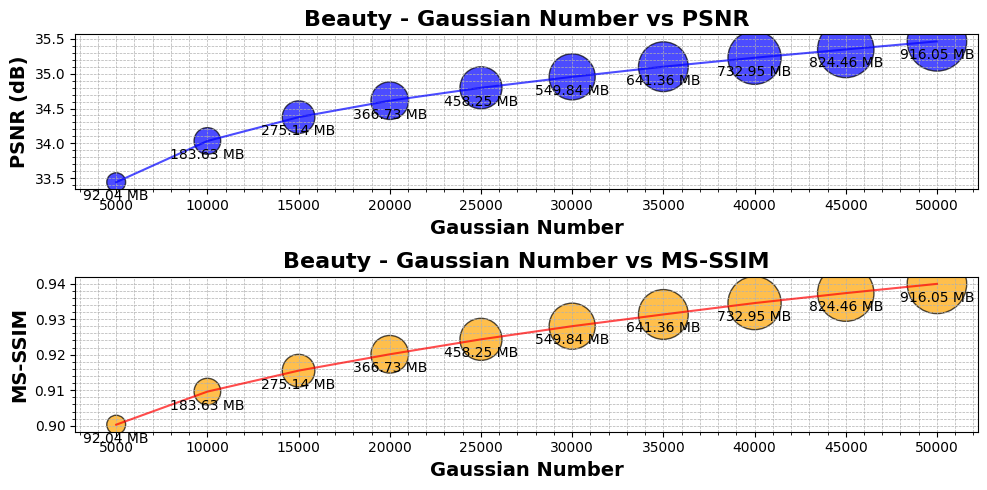

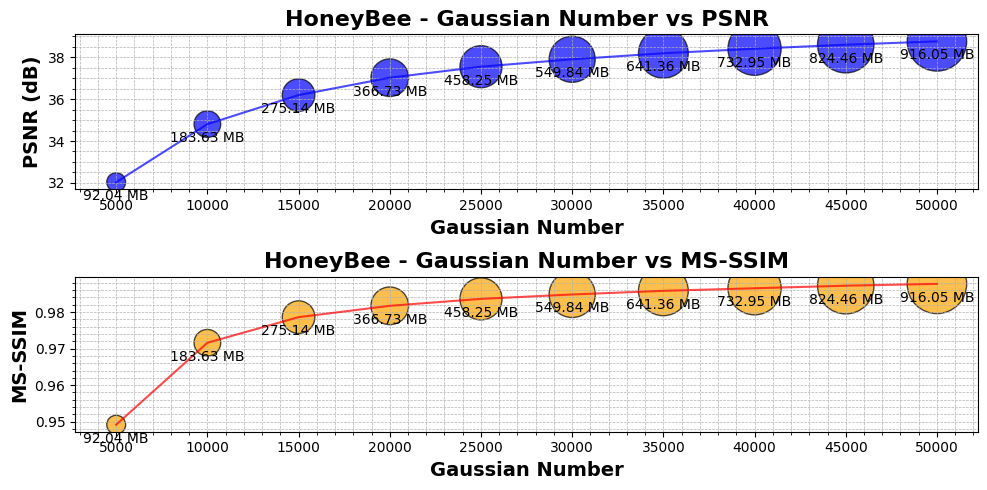

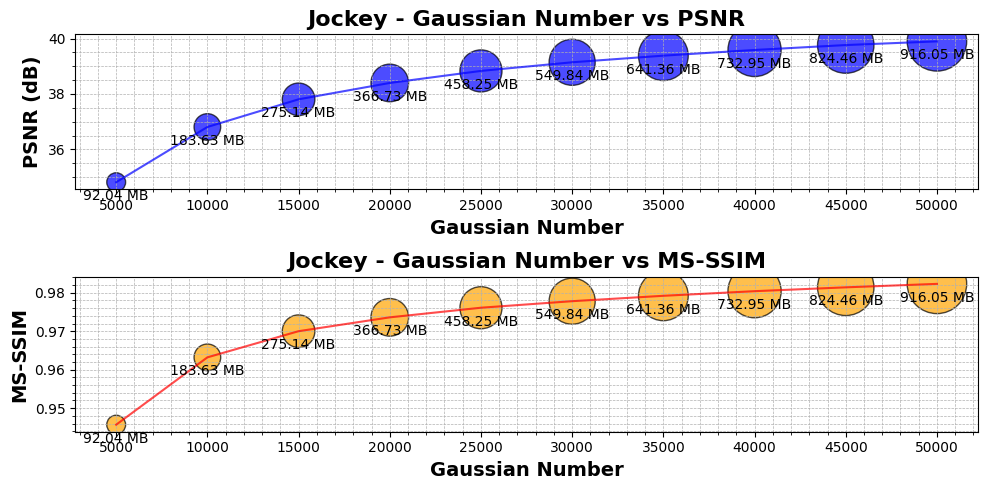

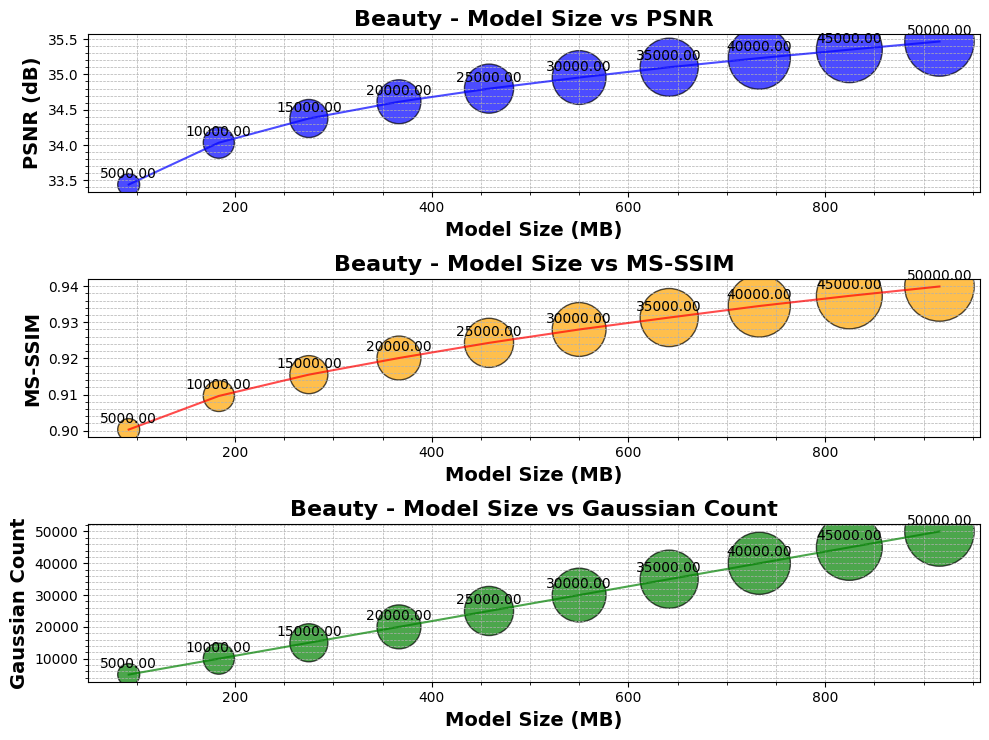

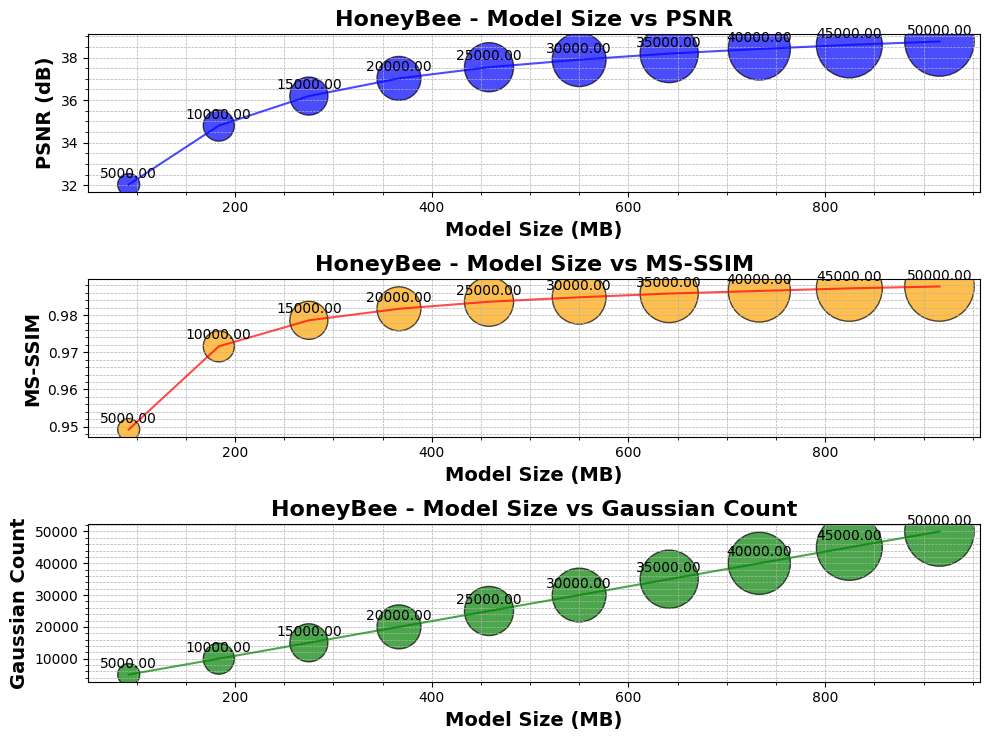

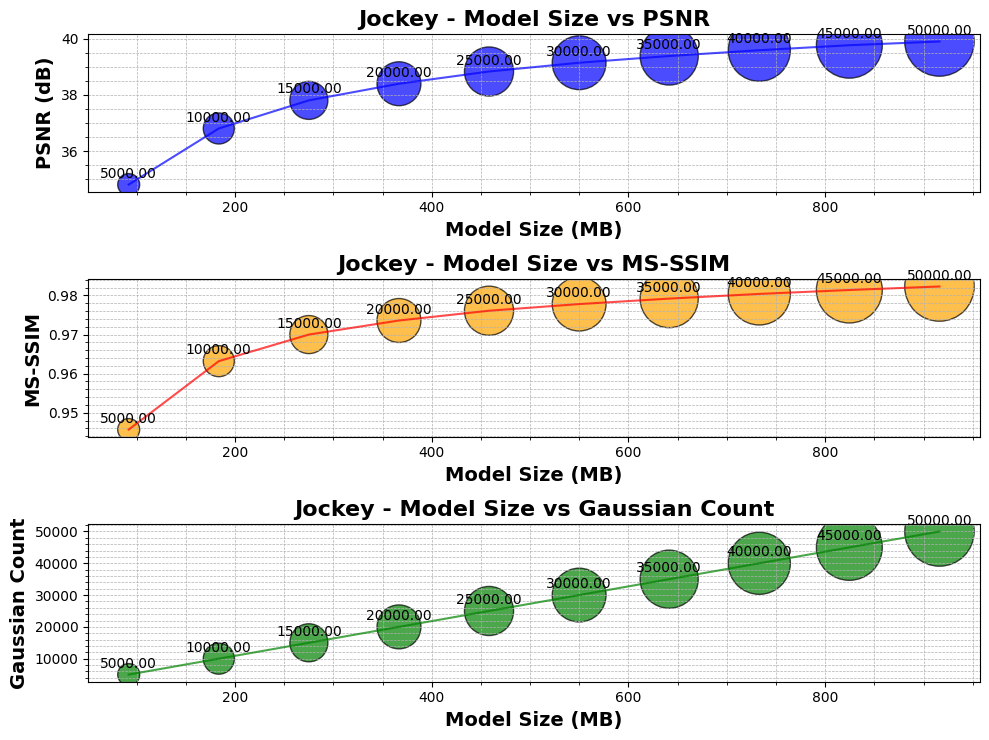

In [32]:
plot_gaussian_vs_metrics(df)
plot_size_vs_metrics(df)